パーセプトロン実装

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

インデントに注意！


In [98]:
class Perceptron(object):
    """パーセプトロンの分類器
    
    パラメータ
    -----------------------------
    eta : float
   　　　　　　　　　　　　 学習率(0.0<eta<=1.0)
    n_iter : int
                  トレーニングデータの最大トレーニング回数
    
    属性
    -----------------------------
    w_ : 1次元配列
    　　　　　　　　　　　　　　適合後の重み
    errors_ : リスト
    　　　　　　　　　　　　　　各エポックでの誤分類数
    """
    def _init_(self,eta=0.01,n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self,X,y):
        """トレーニングデータに適合させる
        パラメータ
         -------------------------------
         X : {配列のようなデータ構造}, shape= [n_samples,n_features]
           トレーニングデータ
           n_samplesはサンプルの個数、n_featuresは特徴量の個数
           
           y : 配列のようなデータ構造,shape =[n_samples]
          目的変数
          
          
           戻り値
           -----------------------------------
           self:object
            """
        self.w_ = np.zeros(1+X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):   #トレーニング回数分トレーニングデータを反復
             errors = 0
            for xi, target in zip(X,y):
                #重み　w　の更新
                 update = self.eta * (target - self.predict(xi))   #self.predict(xi)は予測値(-1 or 1)
                #全ての重みw を更新
                self.w_[1:] += update * xi
                #重みw0　の更新
                self.w_[0] += update *1 #x0は1のため
                #重みの更新が0でない場合は誤分類としてカウント
                errors += int(update != 0.0)
            #反復回数ごとの誤差を格納
            self.errors_.append(errors)
        return self

    def net_input(self,X):
        """総入力z (wx) を計算"""
    return np.dot(X,self.w_[1:]) + self.w_[0] * 1 #x0は1のため

    def predict(self,X):
        """1ステップ後のクラスラベル(1 or -1)を返す"""
    return np.where(self.net_input(X) >=  0.0 ,1,-1)    
    
     

IndentationError: unindent does not match any outer indentation level (<ipython-input-98-e4b6b0e0062e>, line 42)

In [197]:

import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [8]:
a = np.random.randn(2,2)
a

array([[-1.9615371 , -0.95796246],
       [ 0.29459467,  0.08353923]])

In [10]:
for x in a:
    print(x)

[-1.9615371  -0.95796246]
[ 0.29459467  0.08353923]


In [14]:
p = np.arange(3)
q = np.arange(3,6)

In [15]:
p*q

array([ 0,  4, 10])

In [16]:
np.dot(p,q)

14

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
 
# Pandas のデータフレームとして表示
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
target = iris.target
target_names = iris.target_names
labels = target_names[target]

In [5]:
target_values = pd.DataFrame(labels,columns=['target'])

In [6]:
df = pd.concat([df,target_values],axis=1)

In [7]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


iris でパーセプトロンモデルのトレーニング

In [8]:
#目的変数の抽出
y = df.iloc[0:100,4].values
y[:10]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

In [9]:
y = np.where(y == 'setosa', -1, 1)

In [10]:
y[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [11]:
#独立変数を抽出(今回は2つ)
X = df.iloc[0:100,[0,2]].values
X[:10]

array([[ 5.1,  1.4],
       [ 4.9,  1.4],
       [ 4.7,  1.3],
       [ 4.6,  1.5],
       [ 5. ,  1.4],
       [ 5.4,  1.7],
       [ 4.6,  1.4],
       [ 5. ,  1.5],
       [ 4.4,  1.4],
       [ 4.9,  1.5]])

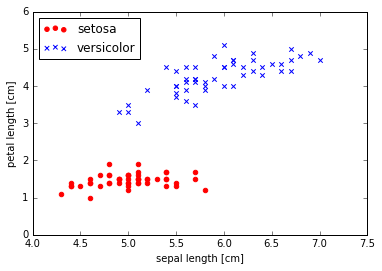

In [12]:
#独立変数をプロット
plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [208]:
#パーセプトロンのオブジェクト生成(インスタンス化)
ppn = Perceptron(eta =0.1,n_iter = 10)
#トレーニングデータへのモデル適合
ppn.fit(X,y)

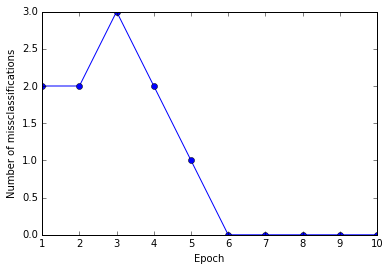

In [209]:
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of missclassifications')
plt.show()

In [210]:
ppn.predict(X)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

二次元データセットの決定境界の可視化

In [13]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier,resolution=0.02):
    #マーカーとカラーマップの準備
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #決定領域のプロット
    x1_min, x1_max = X[:,0].min()-1,X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1,X[:,1].max()+1
    
    #グリッドポイントの生成
    #x1とx2の全ての組み合わせを作る
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                                             np.arange(x2_min,x2_max,resolution))
    
    #各特徴量を１次元配列に変換して予測を実行
    #ravelメソッドはリストを一つのリストにする
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    #参考
    #np.array([[1,2],[3,4]]).T
    #array([[1, 3],
    # [2, 4]])
    
    #予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    
    #グリッドポイントの等高線のプロット
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    
    #軸の範囲の設定
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [14]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

NameError: name 'ppn' is not defined

In [145]:
 #決定領域のプロット
resolution = 0.02
x1_min, x1_max = X[:,0].min()-1,X[:,0].max()+1
x2_min, x2_max = X[:,1].min()-1,X[:,1].max()+1
    
xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                                             np.arange(x2_min,x2_max,resolution))
    

In [146]:
xx1

array([[ 3.3 ,  3.32,  3.34, ...,  7.94,  7.96,  7.98],
       [ 3.3 ,  3.32,  3.34, ...,  7.94,  7.96,  7.98],
       [ 3.3 ,  3.32,  3.34, ...,  7.94,  7.96,  7.98],
       ..., 
       [ 3.3 ,  3.32,  3.34, ...,  7.94,  7.96,  7.98],
       [ 3.3 ,  3.32,  3.34, ...,  7.94,  7.96,  7.98],
       [ 3.3 ,  3.32,  3.34, ...,  7.94,  7.96,  7.98]])

In [183]:
xx1.shape

(305, 235)

In [147]:
np.array([xx1.ravel(),xx2.ravel()]).T

array([[ 3.3 ,  0.  ],
       [ 3.32,  0.  ],
       [ 3.34,  0.  ],
       ..., 
       [ 7.94,  6.08],
       [ 7.96,  6.08],
       [ 7.98,  6.08]])

In [148]:
xx1.ravel()

array([ 3.3 ,  3.32,  3.34, ...,  7.94,  7.96,  7.98])

In [152]:
q = np.array([[1,2],[3,4]]).T

In [158]:
q.reshape([1,4])

array([[1, 3, 2, 4]])

In [160]:
xx1.shape

(305, 235)

In [161]:
x, y = np.meshgrid([1,2,3,4], [5,6,7])
x

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [162]:
y

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7]])

In [165]:
x + y

array([[ 6,  7,  8,  9],
       [ 7,  8,  9, 10],
       [ 8,  9, 10, 11]])

In [163]:
pd.concat(
    [pd.DataFrame(x), pd.DataFrame(y), pd.DataFrame(x + y)], axis=1)

,0,1,2,3,0,1,2,3,0,1,2,3
0,1,2,3,4,5,5,5,5,6,7,8,9
1,1,2,3,4,6,6,6,6,7,8,9,10
2,1,2,3,4,7,7,7,7,8,9,10,11


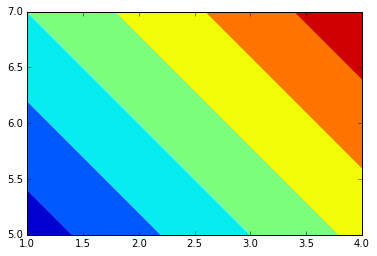

In [167]:
#xとyでx+yの値をプロットする
plt.contourf(x, y, x + y)

ADALINEの実装

In [235]:
class AdalineGD(object):
    """ADAptive Linear Neuron分類器
    
    Parameters
    ------------
    eta : float
        学習率(0.0<eta<=1.0)
    n_iter : int
        トレーニングデータのトレーニング回数

    属性
    -----------
    w_ : 1d-array
        適合後の重み
    errors_ : list
        各エポックでの誤分類数

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            トレーニングデータ
            n_samplesはサンプルの個数、n_featuresは特徴量の個数
        y : array-like, shape = [n_samples]
            目的変数

        戻り値
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):#トレーニング回数分トレーニングデータを繰り返す
            #総入力関数の出力の計算z=wT×x
            output = self.net_input(X)
            #誤差の計算yi-zi
            #yはそれぞれのサンプルの正解(-1 or 1)
            #よってerrorsはそれぞれの正解と総入力関数の差のベクトル
            errors = (y-output)
            #w1,....,wmの更新
            #Δwを算出
            #Xを転置することにより行が特徴量ごとになる
            self.w_[1:] += self.eta * X.T.dot(errors)
            #w0の更新　#詳しくは本に書き込み
            self.w_[0] += self.eta * errors.sum()
            #コスト関数の計算
            cost = (errors**2).sum()/2.0
            #コストの格納
            self.cost_.append(cost)    
        return self

    def net_input(self, X):
        """Calculate net input"""
        #各サンプルごとの総入力関数を通した値
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """線形活性化関数の出力を計算"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [215]:
len(np.dot(X, ppn.w_[1:]))

100

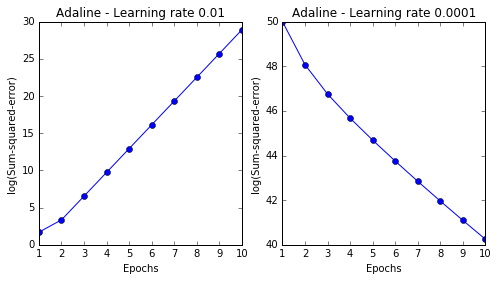

In [227]:
#描画領域を1行2列に分割
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
#勾配降下法によるADALINEの学習(eta=0.01)
ada1 = AdalineGD(n_iter=10,eta=0.01).fit(X,y)
#エポック数とコストの関係を表す折れ線グラフをプロット
ax[0].plot(range(1,len(ada1.cost_)+1), np.log10(ada1.cost_),marker='o')
#軸のラベルの設定
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
#タイトルの設定
ax[0].set_title('Adaline - Learning rate 0.01')

#勾配降下法によるADALINEの学習(eta=0.0001)
ada2 = AdalineGD(n_iter=10,eta=0.0001).fit(X,y)
#エポック数とコストの関係を表す折れ線グラフをプロット
ax[1].plot(range(1,len(ada2.cost_)+1), ada2.cost_,marker='o')
#軸のラベルの設定
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
#タイトルの設定
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()


In [39]:
##勾配降下法は特徴量をスケーリングすると効果的！
#データの標準化
X_std  = np.copy(X)
#各列の標準化
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

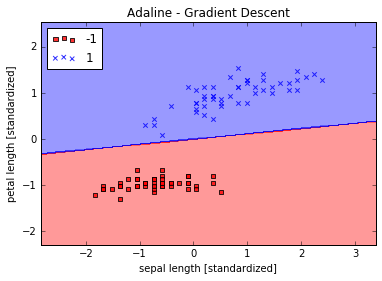

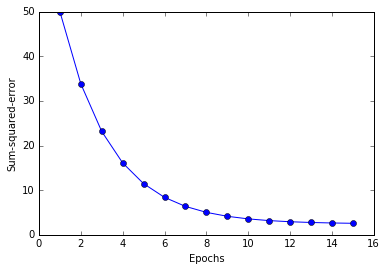

In [240]:
#勾配降下法によるADALINEの学習(eta=0.01)
ada = AdalineGD(n_iter=15,eta=0.01)
ada.fit(X_std,y)
#境界領域のプロット
plot_decision_regions(X_std,y,classifier=ada)
#図の設定
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

#エポック数とコストの関係を表す折れ線グラフをプロット
plt.plot(range(1,len(ada.cost_)+1), ada.cost_,marker='o')
#軸のラベルの設定
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

確率的勾配降下法

In [35]:
from numpy.random import seed
class AdalineSGD(object):
    """ADAptive Linear Neuron分類器
    
    Parameters
    ------------
    eta : float
        学習率(0.0<eta<=1.0)
    n_iter : int
        トレーニングデータのトレーニング回数

    属性
    -----------
    w_ : 1d-array
        適合後の重み
    errors_ : list
        各エポックでの誤分類数
    shuffle : bool(デフォルト:True)
        循環を回避するために各エポックでトレーニングデータをシャッフル
    random_state : int(デフォルト:None)
        シャッフルに利用するシード値を設定


    """
    def __init__(self, eta=0.01, n_iter=10,shuffle=True,random_state = None):
        self.eta = eta
        self.n_iter = n_iter
        #重みの初期化フラグはFalseに設定
        self.w_initialized = False
        #各エポックでトレーニングデータをシャッフルするかどうかのフラグ
        self.shuffle = shuffle
        #引数random_stateが指定された場合は乱数種を設定
        if random_state:
            seed(random_state)

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            トレーニングデータ
            n_samplesはサンプルの個数、n_featuresは特徴量の個数
        y : array-like, shape = [n_samples]
            目的変数

        戻り値
        -------
        self : object

        """
        #重みベクトルの生成
        self._initialize_weights(X.shape[1])
        #コストを格納するリストの生成
        self.cost_ = []

        for i in range(self.n_iter):#トレーニング回数分トレーニングデータを繰り返す
            #指定された場合はトレーニングデータをシャッフル
            if self.shuffle:
                X, y = self._shuffle(X,y)
            #各サンプルのコストを格納するリストの作成
            cost = []
            #各サンプルに対する計算
            for xi, target in zip(X,y):
                #特徴量xiと目的変数yを用いた重みの更新とコストの計算
                cost.append(self._update_weights(xi, target))
            #サンプルの平均コストの計算
            avg_cost = sum(cost)/len(y)
            #平均コストを格納
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self,X,y):
        """重みを再初期化することなくトレーニングデータに適合させる"""
        #初期化されてない場合は初期化を実行
        #(いきなりpartial_fitを使った時にのみ実行される。fitを一度使っていればself.w_intializedはTrueになっている。)
        if not self.w_intialized:
            self._initialized_weights(X.shape[1])
        #目的変数yの要素数が2つ以上の場合は各サンプルの特徴量xiと目的変数targetで重みを更新
        if y.ravel().shape[0] > 1 :
            #各サンプルに対する計算
            for xi, target in zip(X,y):
                self._update_weights(xi, target)
        #目的変数yの要素数が1の場合はサンプル全体の特徴量Xと目的変数yで重みを更新
        else :
            self._update_weights(X,y)
        return self
            
    
    def _shuffle(self,X,y):
        """トレーニングデータをシャッフル"""
        r = np.random.permutation(len(y))
        return X[r] , y[r]
    
    def _initialize_weights(self,m):
        """重みを0に初期化"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
    
    def _update_weights(self,xi,target):
        """ADALINEの学習規則を用いて重みを更新"""
        #活性化関数の出力計算
        output = self.net_input(xi)
        #誤差の計算
        #今回はerrorは一つの値
        error = (target - output)
        #重みの更新
        self.w_[1:] += self.eta * xi.dot(error)
        #w0の更新
        self.w_[0] += self.eta * error
        #コストの計算
        cost = 0.5 * error**2
        return cost
        
    def net_input(self, X):
        """Calculate net input"""
        #各サンプルごとの総入力関数を通した値
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """線形活性化関数の出力を計算"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

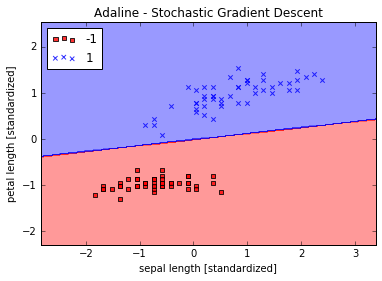

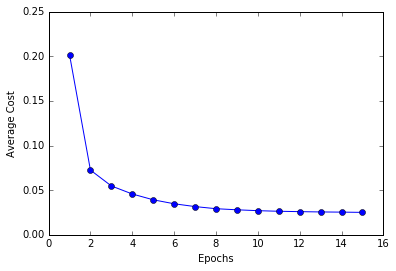

In [40]:
ada = AdalineSGD(n_iter=15,eta=0.01,random_state=1)
ada.fit(X_std,y)
plot_decision_regions(X_std,y,classifier=ada)
#図の設定
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

#エポック数とコストの関係を表す折れ線グラフをプロット
plt.plot(range(1,len(ada.cost_)+1), ada.cost_,marker='o')
#軸のラベルの設定
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

In [37]:
a = np.array([[1,2,3],[4,5,6]])
b = np.array([4,5,6])
c = np.array(2)

In [20]:
a.dot(b)

array([32, 77])

In [25]:
b.dot(c)

array([ 8, 10, 12])

In [26]:
c

array(2)

In [30]:
y.ravel() == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [33]:
y.ravel().shape

(100,)